# HW6. 브라운 운동

$$\dfrac{dv}{dt} = -v+\eta(t)$$

1. 위의 확률 미분방정식을 Runge-Kutta-Helfand-Greenside (RKHG) 방법으로 풀어 $\langle v^2 \rangle$를 구하고 $\langle v^2 \rangle$를 온도 $(T)$의 함수로 그려보세요. (20pts) \\
(단, $v(t=0)=0$, $x(t=0)=0$, $T = 0 \sim 300K$, $\eta$는 실습 7-1번 문제에서 구현한 함수를 사용할 것) (20pts)

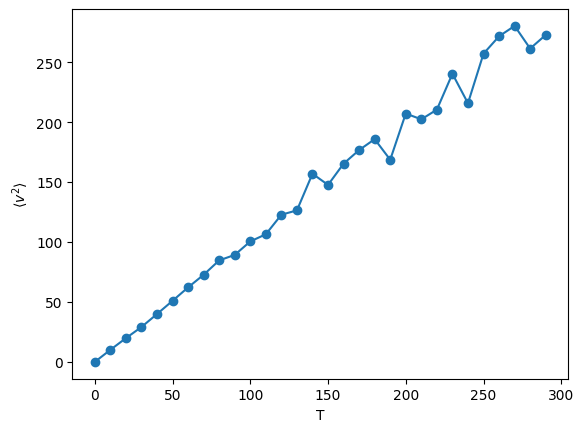

In [8]:
import numpy as np, matplotlib.pyplot as plt
v0 = 0.0; x0 = 0.0;
dt = 0.1; maxt = 1000
t_arr = np.arange(0, maxt, dt)
T_arr = np.arange(0, 300, 10)
vmean_arr = []

def rand(T, dt, size):
    high = np.sqrt(6*T/dt); low = -np.sqrt(6*T/dt)
    return np.random.uniform(low, high, size)

for T in T_arr:
  v2_arr =[]
  x, v = x0, v0
  for t in t_arr:
    v2_arr.append(v**2)
    eta = rand(T, dt, 1)
    vtem = v
    vbar = v+ dt*(-v+eta[0])
    v += dt*(0.5 *(-v -vbar)+eta[0])
    x += dt*0.5*(vtem+v)
  vmean_arr.append(np.mean(v2_arr))

plt.plot(T_arr, vmean_arr, 'o-')
plt.xlabel('T')
plt.ylabel(r'$\langle v^2 \rangle$')
plt.show()

위의 코드는 실습7에서 구현한 rand함수를 활용해 주어진 미분방정식을 RKHG 방법으로 푼 뒤, 온도 T에 따른 $\langle v^2 \rangle$을 그래프로 나타내는 코드이다. 변수 v0와 x0는 v와 x의 초깃값을 나타내며, 문제에서 주어진대로 0으로 설정하였다. dt는 0.1, 시간의 최댓값 maxt는 1000으로 설정하였다. 리스트 t_arr는 시간을 저장하는 리스트로 0 ~ maxt의 시간을 dt으로 간격으로 나누어 저장하였으며, 리스트 T_arr는 온도를 저장하는 리스트로 0~300K의 온도를 10K 간격으로 나누어 저장하였다. 사용자 정의 함수 rand는 변수 T와 dt와 시행횟수 size를 입력받아 low와 high사이의 값을 무작위로 반환한다. 이때 low와 high는 주어진 그림과 같이 $-\sqrt{\dfrac{6T}{\Delta t}}$와 $\sqrt{\dfrac{6T}{\Delta t}}$로 설정하였다. \\
이후 for문을 통해 T_arr의 원소들에 대해 RKHG 방법을 적용함으로써 시간에 따른 미분방정식의 해를 구하여 $\langle v^2 \rangle$의 값을 구한 뒤 vmean_arr에 저장하였다. v2_arr는 각 과정에서 구한 v값의 제곱값을 저장하는 리스트이다. for문 내의 변수 eta는 브라운 운동에서의 $\eta(t)$를 나타내며, rand함수를 통해 구현하였다. for문을 통해 t_arr의 t값들에 대해 eta값이 포함된 미분방정식을 RKHG 방법을 통해 풀어 시간에 따라 충분히 x값과 v값을 업데이트하였으며, $v^2$의 값을 v2_arr에 저장하였다. 이후 vmean_arr에 각 온도에서의 v2_arr 평균값을 추가하였으며, x축이 T_arr, y축이 vmean_arr인 그래프를 작성하였다. \\
위의 그래프로부터 온도 T와 속도 제곱의 평균 $\langle v^2 \rangle$이 대체로 정비례하는 관계를 가짐을 알 수 있다.

2. 1번 문제로 얻은 데이터를 경사하강법을 통해 $\langle v^2 \rangle = \dfrac{k_b}{m}T$로 곡선맞춤하세요. 즉, 기울기를 구하세요. \\
그리고 이를 그래프에 함께 그려서 잘 맞는지 확인하세요. (30pts)

k/m = 0.9917616776274033


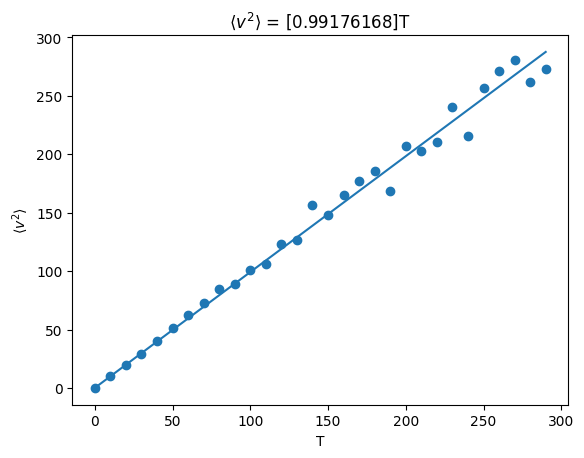

In [11]:
import numpy as np, matplotlib.pyplot as plt
t_arr = np.arange(0, maxt, dt)
T_arr = np.arange(0, 300, 10)

eps = 1.0E-6; c= 0.000001; var = [1]; dvar = [0.001]; delta_var = [0.001]

def f(vars, x):
  return vars[0]*x

def gradient(f, vars, dvars, delta_vars):
  n = len(vars)
  delta_var = np.array(delta_vars)

  while np.any(np.abs(delta_var)>eps):
    for i in range(n):
      delta_var[i] = np.sum((f(vars,T_arr)-vmean_arr)*(f(vars+dvars[i]*np.eye(n)[i], T_arr)-f(vars, T_arr))/dvars[i])
    vars -= c*delta_var

  return vars

vars = gradient(f, var, dvar, delta_var)

r = np.arange(min(T_arr), max(T_arr), 0.01)

print('k/m =', vars[0])
plt.scatter(T_arr, vmean_arr)
plt.plot(r, f(vars, r))
plt.xlabel('T')
plt.ylabel(r'$\langle v^2 \rangle$')
plt.title(r'$\langle v^2 \rangle$ = [{:.8f}]T'.format(vars[0]))
plt.show()

위의 코드는 1번문제에서 구한 vmean_arr 데이터에 경사하강법을 적용하여 curve fitting 한 뒤, 추세선과 데이터를 함께 나타낸 그래프를 작성하는 코드이다. 경사 하강법에서 조절변수 $\vec{a} = (a_{1}, a_{2}, \cdots, a_{M})$ 에 대해 오류 $E$는 $$E(\vec{a}) = \sum_{n=1}^N [y_n-f(x_n;\vec{a})]^2$$
으로 나타낼 수 있으며, 따라서 $f(x)= ax$의 꼴일때  E에 대해 $$\dfrac{\partial E}{\partial a} = -2\sum_{n=1}^N [y_n-ax_n]x_n = 0$$ 을 만족한다. 이후
$$a \rightarrow a+c \sum_{n=1}^N [y_n-ax_n]x_n$$의 방법으로 a값을 업데이트 한다. \\

t_arr와 T_arr는 1번 문제와 동일하게 설정하였으며, 변수 eps는 경사하강법의 오차범위를 나타내는 변수로 1.0E-6로 설정하였으며, 변수 c는 조절변수 $a_i$를 업데이트할 때 변수의 조절정도를 나타내는 변수로 0.000001로 설정하였다. 리스트 var, dvar, delta_var는 각각 $\frac{k_b}{m}$의 초깃값, 편미분시 사용되는 값, 변수의 갱신을 위해 사용되는 값(편미분값)을 담은 리스트이다. var의 초깃값은 1로 설정하였으며, dvar의 초깃값은 0.001, delta_var의 초깃값은 0.001로 설정하였다. 사용자 정의함수 f(vars, x)는 구하려고 하는 변수의 리스트인 vars와 x값을 입력받아 변수와 x로 구성된 함숫값을 반환한다. 본 코드에서 vars[0]은 $\frac{k_b}{m}$를 의미하며, 최종적으로 $\frac{k_b}{m}x$의 값을 반환한다. \\

사용자 정의함수 gradient(f, vars, dvars, delta_vars)는 함수 f, vars, dvars, delta_vars를 입력받아 delta_vars의 값들이 eps보다 작아질 때 까지 경사하강법을 적용한 뒤, 업데이트된 변수를 반환하는 함수이다. 변수 n은 리스트 vars의 길이를 나타내며, 조절변수의 개수를 의미한다. 이후 while문을 통해 변수 vars에 대해 경사하강법을 적용한다.  while문 내의

```
for i in range(n):
  delta_var[i] = np.sum((f(vars,T_arr)-vmean_arr)*(f(vars+dvars[i]*np.eye(n)[i], T_arr)-f(vars, T_arr))/dvars[i])
vars -= c*delta_var
```
부분은 앞서 설명한 $$\dfrac{\partial E}{\partial a_i} = -2\sum^N_{n=1}[y_n-f(x_n;\vec{a})]\dfrac{\partial f(x_n;\vec{a})}{\partial a_i}$$ 과정과 $$a_i \rightarrow a_i-c\dfrac{\partial E}{\partial a_i}$$ 과정을 나타낸다. delta_vars의 모든 원소가 eps보다 오차가 적어지면 while문이 끝나며, 이후 업데이트된 변수 vars를 반환한다. \\
이후 주어진 f, var, dvar, delta_var에 대해 gradient 함수를 적용하여 변수 vars에 저장한 뒤, 이를 기반으로 주어진 data set과 fitting curve를 나타낸 그래프를 작성하였다. \\
본 과정을 통해 얻은 그래프로부터 주어진 vmean_arr의 데이터들과 fitting cureve가 잘 맞음을 확인할 수 있다.

3. $\langle \Delta x^2 \rangle = \langle [x(t)-x(0)]^2 \rangle$를 시간 $t'$에 대한 평균 $\langle [x(t+t')-x(t')]^2 \rangle_{t'}$를 이용해 구하고, 이를 해석적인 답 $2T(t+e^{-t}-1)$과 비교하는 그래프를 그리세요. (30pts) \\
위 시행을 1000번 반복한 결과를 평균내서 해석적인 해와 잘 맞는지 확인하세요. (20pts) \\
단, T=300, dt=0.1, t_max=50

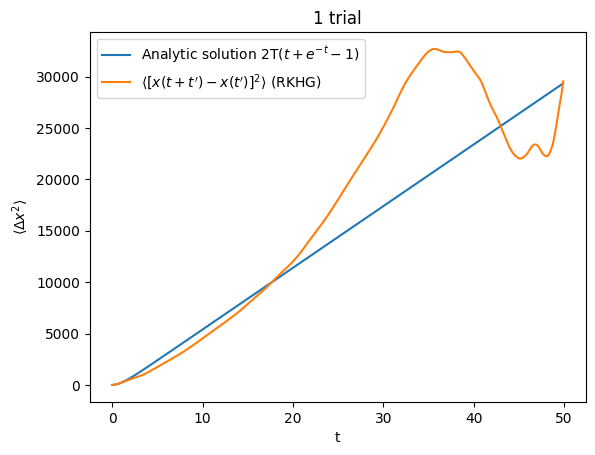

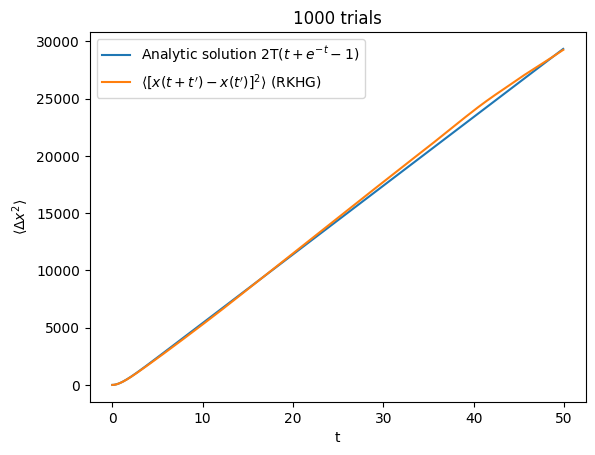

In [16]:
import numpy as np
import matplotlib.pyplot as plt

v0 = 0.0; x0 = 0.0;
dt = 0.1; maxt = 50; T = 300
t_arr = np.arange(0, maxt, dt)
t_steps = len(t_arr)

def Analytic_f(T, t):
    return 2 * T * (t + np.exp(-t) - 1)

def rand(T, dt, size):
    high = np.sqrt(6 * T / dt)
    low = -np.sqrt(6 * T / dt)
    return np.random.uniform(low, high, size)

def x2mean(T, dt, time_steps):
  x_arr = []
  x, v = x0, v0
  for t in t_arr:
      x_arr.append(x)
      eta = rand(T, dt, 1)
      vtem = v
      vbar = v + dt * (-v + eta[0])
      v += dt * (0.5 * (-v - vbar) + eta[0])
      x += dt * 0.5 * (vtem + v)

  x_arr = np.array(x_arr)
  x2mean_arr = np.zeros(t_steps)
  for i in range(t_steps):
      x2mean_arr[i] = np.mean((x_arr[i:] - x_arr[:t_steps - i])**2)
  return x2mean_arr


xmean1_arr =  x2mean(T, dt, t_steps)

xmean1000_arr = np.zeros(t_steps)

for i in range(1000):
    xmean1000_arr += x2mean(T, dt, t_steps)
xmean1000_arr /= 1000


plt.plot(t_arr, Analytic_f(T, t_arr), label='Analytic solution 2T$(t+e^{-t}-1)$')
plt.plot(t_arr, xmean1_arr, label=r"$\langle [x(t+t')-x(t')]^2 \rangle$ (RKHG)")
plt.title("1 trial")
plt.xlabel('t')
plt.ylabel(r'$\langle \Delta x^2 \rangle$')
plt.legend()
plt.show()

plt.plot(t_arr, Analytic_f(T, t_arr), label='Analytic solution 2T$(t+e^{-t}-1)$')
plt.plot(t_arr, xmean1000_arr, label=r"$\langle [x(t+t')-x(t')]^2 \rangle$ (RKHG)")
plt.title("1000 trials")
plt.xlabel('t')
plt.ylabel(r'$\langle \Delta x^2 \rangle$')
plt.legend()
plt.show()


위의 그래프는 $\langle \Delta x^2 \rangle = \langle [x(t)-x(0)]^2 \rangle$를 시간 $t'$에 대한 평균 $\langle [x(t+t')-x(t')]^2 \rangle_{t'}$를 이용해 구하고, 이를 해석적인 답 $2T(t+e^{-t}-1)$과 비교한 그래프를 작성하는 코드이다. \\
변수 v0와 x0는 v와 x의 초깃값을 나타내며, 문제에서 주어진대로 0으로 설정하였다. dt는 0.1, T는 300, 시간의 최댓값 maxt는 50으로 설정하였다. 리스트 t_arr는 시간을 저장하는 리스트로 0 ~ maxt의 시간을 dt으로 간격으로 나누어 저장하였으며, 변수 t_steps는 t_arr의 길이를 나타내는 변수이다. \\
사용자 정의 함수 Analytic_f는 문제에서 주어진 해석적 해를 나타내는 함수로, 변수 T와 t를 입력받아 $2T(t+e^{-t}-1)$의 값을 반환한다. 사용자 정의 함수 rand는 1번 문제와 동일하게 설정하였다. \\
사용자 정의 함수 x2mean은 문제에서 구하고자 하는 시간 $t'$에 대한 평균 $\langle [x(t+t')-x(t')]^2 \rangle_{t'}$를 구하는 함수이다.
리스트 x_arr는 시간 t에 따른 x값을 저장하는 리스트이며, for문을 통해 t_arr의 t값에 대해 RKHG 방법을 적용하여 x_arr에 x값을 저장한 뒤 $\langle [x(t+t')-x(t')]^2 \rangle_{t'}$를 구하였다. 리스트 x2mean_arr는 문제에서 구하고자 하는 평균 제곱 변위 값 $\langle [x(t+t')-x(t')]^2 \rangle_{t'}$를 저장하는 배열이며, 사용자 정의 함수 x2mean 내의

```
for i in range(t_steps):
    x2mean_arr[i] = np.mean((x_arr[i:] - x_arr[:t_steps - i])**2)
```
는 위치 배열 x_arr의 각 시간 단계에서의 변위를 계산하고, 이를 제곱한 뒤 평균을 구하여 $\langle [x(t+t')-x(t')]^2 \rangle_{t'}$를 구하는 코드이다. 이후 최종적으로 x2mean_arr를 반환한다. \\

이후 변수 xmean1_arr에 위의 과정을 1회 반복한 값을 저장하였으며, 변수 xmean1000_arr에 위의 과정을 1000번 반복한 값을 저장하였다. 이후 x축이 t_arr이고 y축이 xmean1_arr인 그래프(1회 시행 그래프)와 축이 t_arr이고 y축이 xmean1000_arr인 그래프(1000회 시행 그래프)를 작성하였다. 본 과정을 통해 도출된 그래프들을 통해 시간 $t'$에 대한 평균 $\langle [x(t+t')-x(t')]^2 \rangle_{t'}$를 구하는 행위를 1회 시행시에는 해석적인 해와 잘 맞지 않는 모습을 보이지만, 1000회 시행시에는 해석적 해와 거의 동일한 그래프 개형을 나타냄을 알 수 있다.